In [2]:
from pathlib import Path

In [3]:
plot_path = Path('Plots')

In [4]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_{case}_{_x}_{_y}.png'
    return plot_path /f

In [5]:
plot_path.mkdir(exist_ok=True, parents=True)

## Load observations: 

In [6]:
import pandas as pd

In [7]:
from bs_fdbck.constants import measurements_path

 from pathlib import Path 
 Path(path).mkdir(exist_ok=True, parents=True)


In [19]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=4, header=1,)# usecols=range(7,12),nrows=7)

df_hyy_1.head()
#df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
#                            'T (degree C).1':'T (degree C)',
#                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
#                             'N100 (cm^-3).1':'N100 (cm^-3)'
#                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1

,year,month,day,LAT,LON,OA (microgram m^-3),CWP (g m^-2),CER (micrometer),COT
0,2012,7,5,60.5,22.5,3.218589,191,12.940000,26.219999
1,2012,7,10,60.5,22.5,4.714353,172,10.950000,24.430000
2,2012,7,14,60.5,22.5,1.451827,106,15.790000,12.030000
3,2012,7,19,60.5,22.5,3.101941,262,16.039999,28.650000
4,2012,7,22,60.5,22.5,0.875789,92,10.630000,14.820000
...,...,...,...,...,...,...,...,...,...
3668,2018,8,13,65.5,29.5,0.674785,191,15.200000,18.969999
3669,2018,8,14,65.5,29.5,1.356364,291,15.200000,31.449999
3670,2018,8,19,65.5,29.5,0.916047,139,18.230000,11.960000
3671,2018,8,20,65.5,29.5,1.325436,177,14.049999,19.869999


In [17]:
import pandas as pd

In [20]:
df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )

In [21]:
df_hyy_1 = df_hyy_1.set_index(['date','LAT','LON'])

In [24]:
df_hyy_1

,,,year,month,day,OA (microgram m^-3),CWP (g m^-2),CER (micrometer),COT
date,LAT,LON,,,,,,,
2012-07-05,60.5,22.5,2012,7,5,3.218589,191,12.940000,26.219999
2012-07-10,60.5,22.5,2012,7,10,4.714353,172,10.950000,24.430000
2012-07-14,60.5,22.5,2012,7,14,1.451827,106,15.790000,12.030000
2012-07-19,60.5,22.5,2012,7,19,3.101941,262,16.039999,28.650000
2012-07-22,60.5,22.5,2012,7,22,0.875789,92,10.630000,14.820000
...,...,...,...,...,...,...,...,...,...
2018-08-13,65.5,29.5,2018,8,13,0.674785,191,15.200000,18.969999
2018-08-14,65.5,29.5,2018,8,14,1.356364,291,15.200000,31.449999
2018-08-19,65.5,29.5,2018,8,19,0.916047,139,18.230000,11.960000


<AxesSubplot:ylabel='Frequency'>

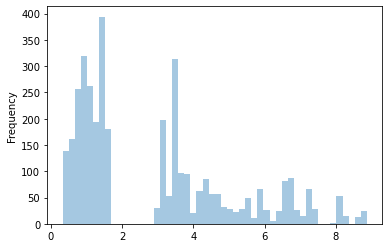

In [25]:
df_hyy_1['OA (microgram m^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')


## load models:

## Read in model data. 

In [26]:
from bs_fdbck.preprocess.launch_monthly_station_collocation import launch_monthly_station_output
from bs_fdbck.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.data_info.variable_info import list_sized_vars_nonsec, list_sized_vars_noresm
import useful_scit.util.log as log
log.ger.setLevel(log.log.INFO)
import time

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
import numpy as np

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

## Settings:

In [30]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [31]:
from_t = '2011-01-01'
to_t = '2015-01-01'

## Cases:

In [32]:
cases_sec = ['OsloAeroSec_intBVOC_f19_f19']#'SECTv21_ctrl_def','SECTv11_noresm2_ctrl', 'SECTv11_ctrl_fbvoc','SECTv11_noresm2_adj','SECTv11_noresm2_eq18']#'SECTv11_noresm2_NFHIST']#'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
cases_orig = ['OsloAero_intBVOC_f19_f19']#, 'noSECTv21_ox_ricc']#'noSECTv11_noresm2_ricc', 'noSECTv11_noresm2_ctrl', 'noSECTv11_ctrl_fbvoc','noSECTv11_ctrl']#'noSECTv11_noresm2_NFHIST']#'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl

In [33]:
case_mod = cases_orig[0]

In [34]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-04-12 12:31:33,097 useful_scit  INFO     TIMES:****: 2011-01-01 2015-01-01


2022-04-12 12:31:33,097 useful_scit  INFO     TIMES:****: 2011-01-01 2015-01-01


In [35]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','A',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene',
      
      
      ]


varl =['N100','DOD500','DOD440','ACTREL','ACTNL','TGCLDLWP', #,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','FCTL',
       'TOT_CLD_VISTAU','TOT_ICLD_VISTAU','TGCLDCWP',
       'TAUTLOGMODIS',
       'LWPMODIS','CLWMODIS','REFFCLWMODIS','TAUTMODIS','TAUWMODIS',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 


In [36]:
for case_name in cases_sec:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')
for case_name in cases_orig:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS
UUUPS


In [37]:
dic_ds = dict()
for ca in cases_orig + cases_sec:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    dic_ds[ca]=ds

2022-04-12 12:31:34,153 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/N100_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD500_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD440_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTREL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTNL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocate

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/N100_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD500_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD440_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTREL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTNL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/TGCLDLWP_OsloAero_i

2022-04-12 12:31:41,132 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/N100_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD500_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD440_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/ACTREL_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/ACTNL_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/N100_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD500_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD440_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/ACTREL_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/ACTNL_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_in

## Compute ACTNL_incld

In [38]:
for ca in cases_orig + cases_sec:
    _ds = dic_ds[ca]
    _ds['ACTNL_incld'] = _ds['ACTNL']/_ds['FCTL']
    _ds['ACTREL_incld'] = _ds['ACTREL']/_ds['FCTL']
    _ds['TOT_ICLD_VISTAU_s']= _ds['TOT_ICLD_VISTAU'].sum('lev')
    _ds['TOT_CLD_VISTAU_s']= _ds['TOT_CLD_VISTAU'].sum('lev')

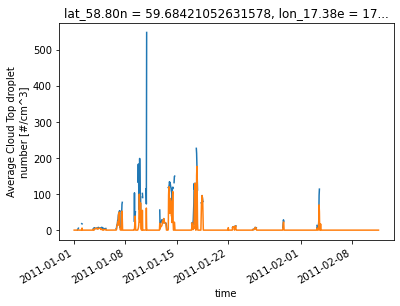

In [39]:
dic_ds[ca]['ACTNL_incld'].isel(station=0).isel(time=slice(0,1000)).plot()
dic_ds[ca]['ACTNL'].isel(station=0).isel(time=slice(0,1000)).plot()

In [40]:
_ds.load()

<xarray.Dataset>
Dimensions:            (time: 34801, station: 24, lev: 32)
Coordinates: (12/51)
    lat_58.80n         float64 59.68
    lon_17.38e         float64 17.5
    lat_58.38n         float64 57.79
    lon_8.25e          float64 7.5
    lat_67.97n         float64 67.26
    lon_24.12e         float64 25.0
    ...                 ...
    lon_23.58e         float64 22.5
    lat_44.18n         float64 44.53
    lon_10.68e         float64 10.0
  * time               (time) datetime64[ns] 2011-01-01 ... 2014-12-21
  * station            (station) object 'ASP' 'BIR' 'PAL' ... 'JFJ' 'BEO' 'CMN'
  * lev                (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
Data variables: (12/46)
    ACTNL              (station, time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ACTREL             (station, time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    BC_A               (station, time, lev) float32 9.906e-14 ... 5.271e-11
    BC_AC              (station, time, lev) float32 6.619e-18 ... 1.319e-12
    BC_AI              (station, time, lev) float32 2.214e-18 ... 5.713e-12
    BC_AX              (station, time, lev) float32 4.853e-14 ... 2.814e-11
    ...                 ...
    TOT_CLD_VISTAU     (station, time, lev) float32 nan nan nan ... nan nan nan
    TOT_ICLD_VISTAU    (station, time, lev) float32 nan nan nan ... nan nan nan
    ACTNL_incld        (station, time) float32 nan nan nan nan ... nan nan nan
    ACTREL_incld       (station, time) float32 nan nan nan nan ... nan nan nan
    TOT_ICLD_VISTAU_s  (station, time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    TOT_CLD_VISTAU_s   (station, time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [41]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [42]:

def get_dic_df_mod(model_lev_i=-1):
    dic_df = dict()
    dic_df_sm = dict()

    for ca in dic_ds.keys():
        ds = dic_ds[ca]
        ds_sel = ds.sel(station='SMR').isel( lev=model_lev_i)
        rho = pressure*100/(R*ds_sel['T'])
    
        ds_sel['rho'] = rho.load()
        df = ds_sel.to_dataframe()
        ls_so4 = [c for c in df.columns if 'SO4_' in c]#['SO4_NA']

        for s in ['SOA_NA','SOA_A1','OM_AC','OM_AI','OM_NI']+ls_so4:
            un = '$\micro$g/m3'
            if ds_sel[s].attrs['units']!=un:
                ds_sel[s] = ds_sel[s]*ds_sel['rho']*kg2ug
                ds_sel[s].attrs['units']=un

        df = ds_sel.to_dataframe()
        df = df.drop([co for co in df.columns if (('lat_' in co)|('lon_' in co))], 
                     axis=1)

        df['SOA'] = df['SOA_NA'] + df['SOA_A1']

        df['OA'] = df['SOA_NA'] + df['SOA_A1'] +df['OM_AC']+df['OM_AI']+df['OM_NI']
        df['POA'] = df['OM_AC']+df['OM_AI']+df['OM_NI']
    
        df['SO4']=0
        for s in ls_so4:
            print(s)
            
            print(df[s].mean())
            df['SO4'] = df['SO4'] + df[s]
    
    
        df_daily = df.resample('D').median()

        months = (df_daily.index.month==7 )|(df_daily.index.month==8  )

        df_s = df_daily[months]
        df_s.loc[:,'year'] = df_s.index.year.values

        df_s.loc[:,'T_C'] = df_s['T'].values-273.15
        df_s.index = df_s.index.rename('date')
        df_merge = df_s#pd.merge(df_s, df_hyy_1, right_on='date', left_on='date')
        
        df_merge['year'] = df_merge.index.year

        
        dic_df[ca] = df_merge
        print(ca)
    
        months = (df.index.month==7 )|(df.index.month==8  )

        df_s = df[months]
        df_ym = df_s.resample('Y').median()
        df_ym.loc[:,'year'] = df_ym.index.year.values

        df_ym.loc[:,'T_C'] = df_ym['T'].values-273.15
        
        dic_df_sm[ca] = df_ym
        print(ca)
    return dic_df_sm, dic_df


dic_df_sm, dic_df = get_dic_df_mod(model_lev_i=-1)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


SO4_A1
0.17030063
SO4_A2
0.5390032
SO4_AC
0.006460039
SO4_NA
0.026009653
SO4_PR
0.06095547
OsloAero_intBVOC_f19_f19
OsloAero_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/tmp/ipykernel_45833/1100393723.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['year'] = df_merge.index.year


SO4_A1
0.1709455
SO4_A2
0.5567406
SO4_AC
0.0059770155
SO4_NA
0.011198968
SO4_PR
0.061414376
OsloAeroSec_intBVOC_f19_f19
OsloAeroSec_intBVOC_f19_f19


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
import numpy as np

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [46]:
cols = [
    #'#ffff33',
    '#0074c3',
    '#eb4600',
    '#f8ae00',
    '#892893',
    '#66ae00',
    '#00c1f3',
    '#b00029',
]

In [47]:
from matplotlib import cm

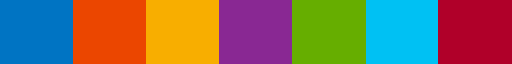

In [48]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

my_cmap = ListedColormap(cols)

my_cmap

In [49]:
type(df_hyy_1['year'][0])

numpy.int64

In [50]:
col_dic = {}
for y,c in zip(range(2012, 2019), cols):
    col_dic[y] =c

## Try to reproduce plot from paper:

In [51]:
df_hyy_1['OA_low'] = df_hyy_1['OA (microgram m^-3)']<1.59
df_hyy_1['OA_high'] = df_hyy_1['OA (microgram m^-3)']>3.02

In [52]:

df_hyy_1=df_hyy_1.assign(OA_category= pd.NA)
df_hyy_1.loc[df_hyy_1['OA_high'], 'OA_category'] = 'OA high'
df_hyy_1.loc[df_hyy_1['OA_low'], 'OA_category'] = 'OA low'



In [53]:
df_hyy_1['CWP (g m^-2)'].min()

61

In [54]:
bins = pd.IntervalIndex.from_tuples([(60, 100), (100, 140), (140, 180), (180, 220), (220, 260), (260, 300), (300, 340)])

In [55]:
labels=[ 80, 120, 160, 200, 240, 280, 320]

In [56]:
df_hyy_1['CWP_cut']=pd.cut(df_hyy_1['CWP (g m^-2)'], bins=bins, labels=labels)
df_hyy_1['CWP_qcut']=pd.qcut(df_hyy_1['CWP (g m^-2)'], 6)#bins=bins, labels=labels)

In [57]:
df_hyy_1['CWP_qcutl'] = df_hyy_1['CWP_qcut'].apply(lambda x:x.mid)

df_hyy_1['CWP_cutl'] = df_hyy_1['CWP_cut'].apply(lambda x:x.mid)

In [58]:
df_hyy_1.head()

,,,year,month,day,OA (microgram m^-3),CWP (g m^-2),CER (micrometer),COT,OA_low,OA_high,OA_category,CWP_cut,CWP_qcut,CWP_qcutl,CWP_cutl
date,LAT,LON,,,,,,,,,,,,,,
2012-07-05,60.5,22.5,2012,7,5,3.218589,191,12.940000,26.219999,False,True,OA high,"(180, 220]","(154.0, 196.0]",175.0,200.0
2012-07-10,60.5,22.5,2012,7,10,4.714353,172,10.950000,24.430000,False,True,OA high,"(140, 180]","(154.0, 196.0]",175.0,160.0
2012-07-14,60.5,22.5,2012,7,14,1.451827,106,15.790000,12.030000,True,False,OA low,"(100, 140]","(88.0, 120.0]",104.0,120.0
2012-07-19,60.5,22.5,2012,7,19,3.101941,262,16.039999,28.650000,False,True,OA high,"(260, 300]","(254.0, 687.0]",470.5,280.0
2012-07-22,60.5,22.5,2012,7,22,0.875789,92,10.630000,14.820000,True,False,OA low,"(60, 100]","(88.0, 120.0]",104.0,80.0


In [59]:
df_hyy_1.tail()

,,,year,month,day,OA (microgram m^-3),CWP (g m^-2),CER (micrometer),COT,OA_low,OA_high,OA_category,CWP_cut,CWP_qcut,CWP_qcutl,CWP_cutl
date,LAT,LON,,,,,,,,,,,,,,
2018-08-13,65.5,29.5,2018,8,13,0.674785,191,15.200000,18.969999,True,False,OA low,"(180, 220]","(154.0, 196.0]",175.0,200.0
2018-08-14,65.5,29.5,2018,8,14,1.356364,291,15.200000,31.449999,True,False,OA low,"(260, 300]","(254.0, 687.0]",470.5,280.0
2018-08-19,65.5,29.5,2018,8,19,0.916047,139,18.230000,11.960000,True,False,OA low,"(100, 140]","(120.0, 154.0]",137.0,120.0
2018-08-20,65.5,29.5,2018,8,20,1.325436,177,14.049999,19.869999,True,False,OA low,"(140, 180]","(154.0, 196.0]",175.0,160.0
2018-08-27,65.5,29.5,2018,8,27,0.823307,141,17.430000,13.030000,True,False,OA low,"(140, 180]","(120.0, 154.0]",137.0,160.0


3639


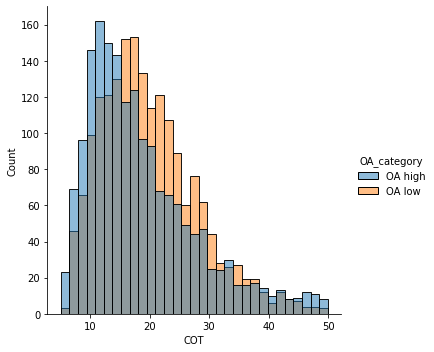

In [60]:
sns.displot(#x='TGCLDLWP', 
            x='COT',
            data=df_hyy_1[df_hyy_1['OA_category'].notna()],
            hue='OA_category',
           #kind='swarm'
           )
print(len(df_hyy_1[df_hyy_1['OA_category'].notna()]))

3639


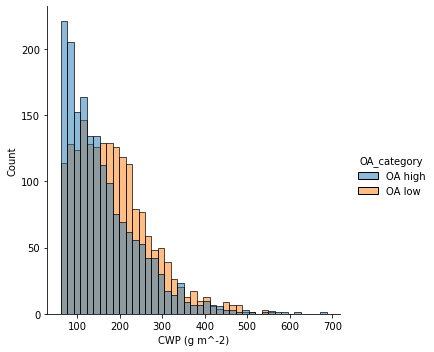

In [61]:
sns.displot(#x='TGCLDLWP', 
            x='CWP (g m^-2)',
            data=df_hyy_1[df_hyy_1['OA_category'].notna()],
            hue='OA_category',
           #kind='swarm'
           )
print(len(df_hyy_1[df_hyy_1['OA_category'].notna()]))

In [157]:
df_hyy_1_sub = df_hyy_1[(df_hyy_1['OA_low'] | df_hyy_1['OA_high'])]

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


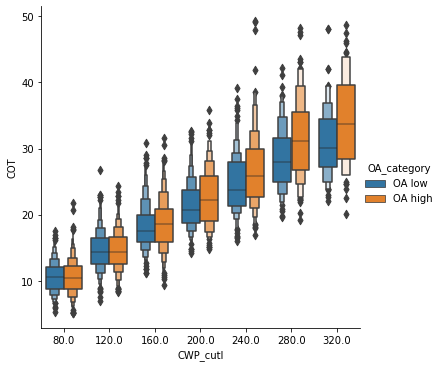

In [181]:
sns.catplot(x='CWP_cutl', 
            y='COT',
            #data=df_mod.reset_index(),
            #data=df_mod[~df_mod['OA_mid_range']].reset_index(),
            data=df_hyy_1[df_hyy_1['OA_category'].notna()].reset_index(),

            hue='OA_category',
           kind='boxen',
            #order==['OA low','OA high'],
            hue_order=['OA low','OA high'],
            
           )
#plt.ylim([0,250])

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

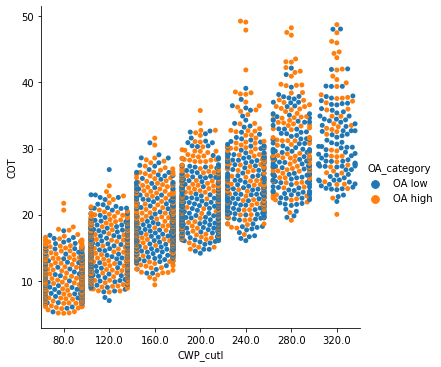

In [182]:
sns.catplot(x='CWP_cutl', 
            y='COT',
            #data=df_mod.reset_index(),
            #data=df_mod[~df_mod['OA_mid_range']].reset_index(),
            data=df_hyy_1[df_hyy_1['OA_category'].notna()].reset_index(),

            hue='OA_category',
           kind='swarm',
            #order==['OA low','OA high'],
            hue_order=['OA low','OA high'],
            
           )
#plt.ylim([0,250])

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(0.0, 25.0)

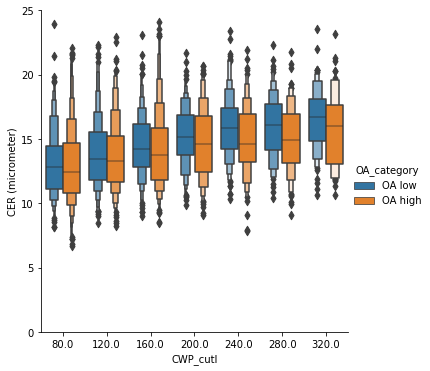

In [185]:
sns.catplot(x='CWP_cutl', 
            #y='COT',
            y = 'CER (micrometer)',
            
            #data=df_mod.reset_index(),
            #data=df_mod[~df_mod['OA_mid_range']].reset_index(),
            data=df_hyy_1[df_hyy_1['OA_category'].notna()].reset_index(),

            hue='OA_category',
           kind='boxen',
            #order==['OA low','OA high'],
            hue_order=['OA low','OA high'],
            
           )
plt.ylim([0,25])

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

(0.0, 25.0)

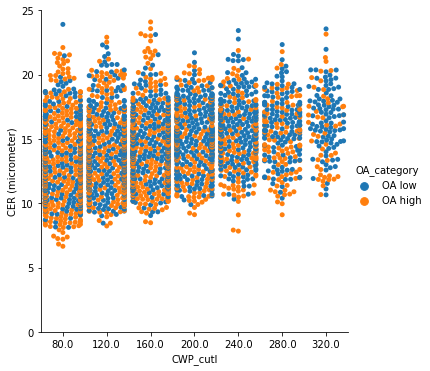

In [186]:
sns.catplot(x='CWP_cutl', 
            #y='COT',
            y = 'CER (micrometer)',
            
            #data=df_mod.reset_index(),
            #data=df_mod[~df_mod['OA_mid_range']].reset_index(),
            data=df_hyy_1[df_hyy_1['OA_category'].notna()].reset_index(),

            hue='OA_category',
           kind='swarm',
            #order==['OA low','OA high'],
            hue_order=['OA low','OA high'],
            
           )
plt.ylim([0,25])